## fkpt code

In [1]:
#import standard libraries
import matplotlib
import matplotlib.pyplot as plt

#fkpt code
from use_fkpt import *

### Inputs

Set the **cosmological parameters** ($h, \Omega_m, z$) for the input real space linear power spectrum.

In [2]:
h = 0.67                   #h = H0/100
Om = 0.29                  #matter density
z_pk = 0.5                 #redshift

Define a vector for the **nuisances parameters**: 

*NuisanParams = [b1, b2, bs2, b3nl, alpha0, alpha2, alpha4, ctilde, alpha0shot, alpha2shot, pshotp]*

In [3]:
#bias parameters
b1 = 1.70
b2 = -0.45
bs2 = -4/7*(b1 - 1)
b3nl = 32/315*(b1 - 1)

#EFT parameters
alpha0 = 3.0               #units: [Mpc/h]^2
alpha2 = -29.0             #units: [Mpc/h]^2
alpha4 = 0.0               #units: [Mpc/h]^2
ctilde = 0.0               #units: [Mpc/h]^4

#Stochatics parameters
alpha0shot = 0.08
alpha2shot = -8.0          #units: [Mpc/h]^2
pshotp = 5000              #units: [Mpc/h]^3
NuisanParams = [b1, b2, bs2, b3nl, alpha0, alpha2, alpha4,
                ctilde, alpha0shot, alpha2shot, pshotp]

### Running the fkpt code

Read the corresponding linear power spectrum file. It can also be computed using an Einstein-Boltzmann code like CAMB, CLASS, etc.


The input linear power spectrum should be the LCDM one and given in a two column *(k,pkl)* file in *Mpc/h* units at the desired output redshift. This file must be added inside the **'Input'** folder. To read it, write the file's name in **'pk_name = name_of_file'**, as shown below.

The *fkpt* code can be executed for two different models: the usual LCDM **(model = 'LCDM')** and the Hu-Sawicky **(model = 'HS')**. 

Let's compute the 1-loop redshift space power spectrum for different configurations: with and without the Alcock-Paczyński (AP) effect. To accomplish this, we will use the '**run_fkpt**' function.

#### Using CLASS to compute the linear power spectrum

To compute the linear power spectrum using CLASS, we use the '**generate_ps**' function.

In [4]:
ps = generate_ps(h = 0.6711, ombh2 = 0.022, omch2 = 0.122, omnuh2 = 0.0006442,
            As = 2e-9, ns = 0.965, z = 0.97, N_ur = 2.0328,
            khmin = 0.0001, khmax = 2.0, nbk = 1000, spectra = 'matter')

To run the fkpt code, use the function '**run_fkpt**' as shown below.

In [5]:
fkpt_CLASS = run_fkpt(pk_name = 'ps_'+str(ps['proc'])+'_z'+str(ps['z'])+'.txt',
                     zout = z_pk, Om = Om, h = h,
                     b1 = b1, b2 = b2, bs2 = bs2, b3nl = b3nl,
                     alpha0 = alpha0, alpha2 = alpha2, alpha4 = alpha4,
                     ctilde = ctilde, pshotp = pshotp,  alpha0shot = alpha0shot, alpha2shot = alpha2shot,
                     model = 'LCDM', chatty=3)


Rescaling input power spectrum from LCDM to MG. Change to is_PS_input_LCDM=0 if dont want to
0.491216


Use '**chatty=3**' to retrieve the value of sigma8 for the LCDM or HS model.

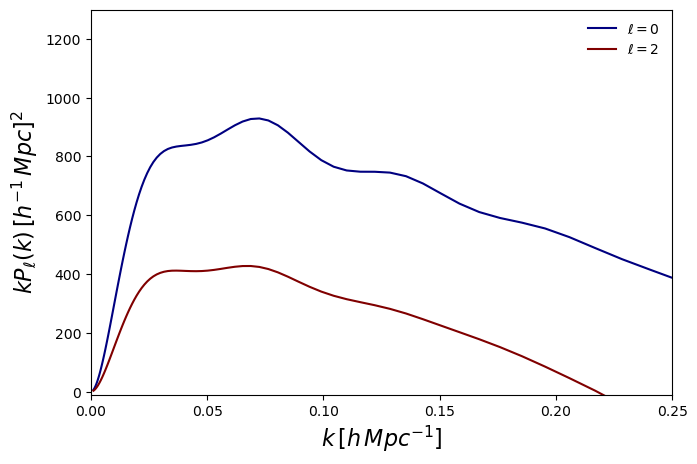

In [6]:
#plots
fig, axs = plt.subplots(figsize = (7.5, 5.0))
axs.set_xlabel(r'$k \, [h\, {Mpc}^{-1}]$', fontsize =  16);
axs.set_ylabel(r'$k P_{\ell}(k) \, [h^{-1} \, {Mpc}]^2$', fontsize =  16);

#monopole
axs.plot(fkpt_CLASS['k'], fkpt_CLASS['k'] * fkpt_CLASS['mono'],
         color = 'navy', label=r'$\ell = 0$');



#quadrupole
axs.plot(fkpt_CLASS['k'], fkpt_CLASS['k'] * fkpt_CLASS['quad'],
         color = 'maroon', label=r'$\ell = 2$');


axs.set_xlim([0.0, 0.25]);
axs.set_ylim([-10, 1300]);

leg1 = axs.legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);
#plt.savefig("fkpt.pdf")

#### Reading your favorite the linear power spectrum file

In case you prefer to read the linear power spectrum file(s), please note that it should be located in the '**Input**' folder. In this scenario, you only need to specify the file name using '**pk_name = file_name**'.

In [7]:
#running fkpt for LCDM model without AP test
fkpt_LCDM = run_fkpt(pk_name = 'pkl_z05.dat',
                     zout = z_pk, Om = Om, h = h,
                     b1 = b1, b2 = b2, bs2 = bs2, b3nl = b3nl,
                     alpha0 = alpha0, alpha2 = alpha2, alpha4 = alpha4,
                     ctilde = ctilde, pshotp = pshotp,  alpha0shot = alpha0shot, alpha2shot = alpha2shot,
                     model = 'LCDM', chatty=0)


Rescaling input power spectrum from LCDM to MG. Change to is_PS_input_LCDM=0 if dont want to


**To include the AP test:**

- set a fiducial value for $\Omega^{AP}_m$. 

- update the Outputs files using the function **'update_kfunctions'**, as shown below.

- compute the RSD multipoles with AP using the function **'RSDmultipoles'**, set '**AP = True**'.

In [8]:
OmAP = 0.31                                       #Fiducial value (for AP test!)
update_kfuncs = update_kfunctions(zout = z_pk)    #Update the Outputs files

In [9]:
#running fkpt for LCDM model with AP test
kh, Pk0LCDM_AP, Pk2LCDM_AP, Pk4LCDM_AP = RSDmultipoles(kev = fkpt_LCDM['k'], NuisanParams = NuisanParams,
                                                       z_pk = z_pk, OmM = Om, Omfid = OmAP, AP = True)

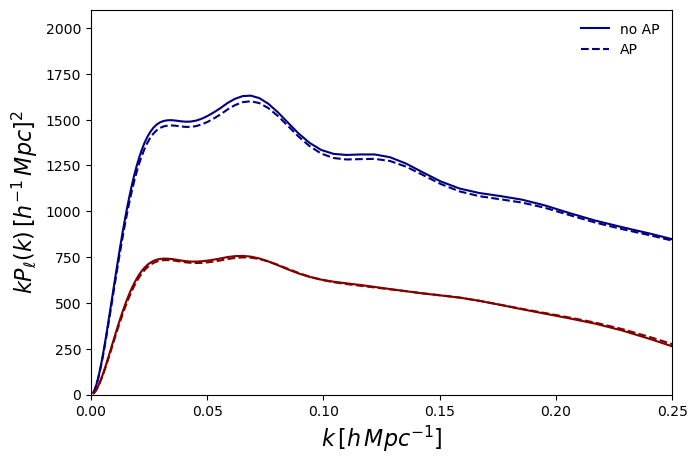

In [10]:
#plots
fig, axs = plt.subplots(figsize = (7.5, 5.0))
axs.set_xlabel(r'$k \, [h\, {Mpc}^{-1}]$', fontsize =  16);
axs.set_ylabel(r'$k P_{\ell}(k) \, [h^{-1} \, {Mpc}]^2$', fontsize =  16);

#monopole
axs.plot(fkpt_LCDM['k'], fkpt_LCDM['k'] * fkpt_LCDM['mono'],
         color = 'navy', label=r'no AP');

axs.plot(kh, kh * Pk0LCDM_AP,
         color = 'navy', ls = '--', label=r'AP');

#quadrupole
axs.plot(fkpt_LCDM['k'], fkpt_LCDM['k'] * fkpt_LCDM['quad'],
         color = 'maroon');

axs.plot(kh, kh * Pk2LCDM_AP,
         color = 'maroon', ls = '--');

axs.set_xlim([0.0, 0.25]);
axs.set_ylim([0, 2100]);

leg1 = axs.legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);
#plt.savefig("fkpt_AP.pdf")

**Hu-Sawicky model in fkpt**

To run the fkpt code with the Hu-Sawicky model, just set **(model = 'HS')** and add the corresponding **fR0** value.

Let's compute the 1-loop redshift space power spectrum for different configurations:

In [11]:
fkpt_F4 = run_fkpt(pk_name = 'pkl_z05.dat',
                   zout = z_pk, Om = Om, h = h,
                   b1 = b1, b2 = b2, bs2 = bs2, b3nl = b3nl,
                   alpha0 = alpha0, alpha2 = alpha2, alpha4 = alpha4,
                   ctilde = ctilde, pshotp = pshotp,  alpha0shot = alpha0shot, alpha2shot = alpha2shot,
                   model = 'HS', fR0 = 1e-4)


Rescaling input power spectrum from LCDM to MG. Change to is_PS_input_LCDM=0 if dont want to


In [12]:
fkpt_F10 = run_fkpt(pk_name = 'pkl_z05.dat',
                   zout = z_pk, Om = Om, h = h,
                   b1 = b1, b2 = b2, bs2 = bs2, b3nl = b3nl,
                   alpha0 = alpha0, alpha2 = alpha2, alpha4 = alpha4,
                   ctilde = ctilde, pshotp = pshotp,  alpha0shot = alpha0shot, alpha2shot = alpha2shot,
                   model = 'HS', fR0 = 1e-10)


Rescaling input power spectrum from LCDM to MG. Change to is_PS_input_LCDM=0 if dont want to


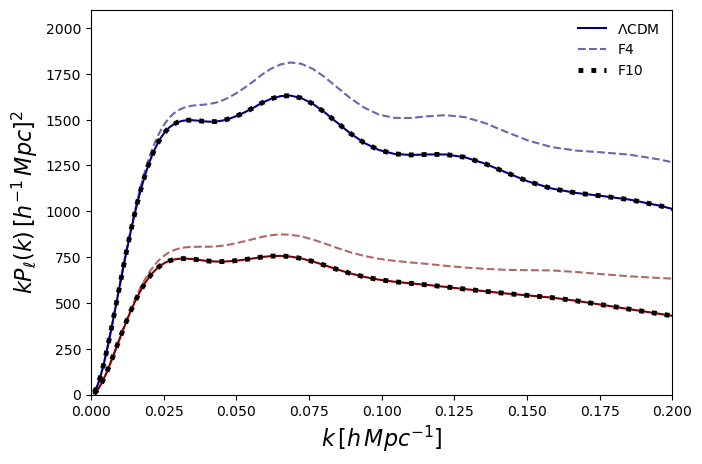

In [13]:
#plots
fig, axs = plt.subplots(figsize = (7.5, 5.0))
axs.set_xlabel(r'$k \, [h\, {Mpc}^{-1}]$', fontsize =  16);
axs.set_ylabel(r'$k P_{\ell}(k) \, [h^{-1} \, {Mpc}]^2$', fontsize =  16);

#monopole
axs.plot(fkpt_LCDM['k'], fkpt_LCDM['k'] * fkpt_LCDM['mono'],
         color = 'navy', label=r'$\Lambda$CDM');

axs.plot(fkpt_F4['k'], fkpt_F4['k'] * fkpt_F4['mono'],
         color = 'navy', ls = '--', label=r'F4', alpha = 0.6);

axs.plot(fkpt_F10['k'], fkpt_F10['k'] * fkpt_F10['mono'],
         color = 'k', ls = ':', label=r'F10', lw = 3.5)

#quadrupole
axs.plot(fkpt_LCDM['k'], fkpt_LCDM['k'] * fkpt_LCDM['quad'],
         color = 'maroon');

axs.plot(fkpt_F4['k'], fkpt_F4['k'] * fkpt_F4['quad'],
         color = 'maroon', ls = '--', alpha = 0.6);

axs.plot(fkpt_F10['k'], fkpt_F10['k'] * fkpt_F10['quad'],
         color = 'k', ls = ':', lw = 3.5);

axs.set_xlim([0.0, 0.2]);
axs.set_ylim([0, 2100]);

leg1 = axs.legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);
#plt.savefig("fkpt_HS.pdf")

Intermediate computations are automatically stored in a folder called *Ouput*, there are the linear and non-linear results for the wiggle and non-wiggle (nw) terms.

### Investigate Numerical Effect of rmin bug

See https://github.com/alejandroaviles/fkpt/issues/2


Rescaling input power spectrum from LCDM to MG. Change to is_PS_input_LCDM=0 if dont want to

Rescaling input power spectrum from LCDM to MG. Change to is_PS_input_LCDM=0 if dont want to

Rescaling input power spectrum from LCDM to MG. Change to is_PS_input_LCDM=0 if dont want to

Rescaling input power spectrum from LCDM to MG. Change to is_PS_input_LCDM=0 if dont want to


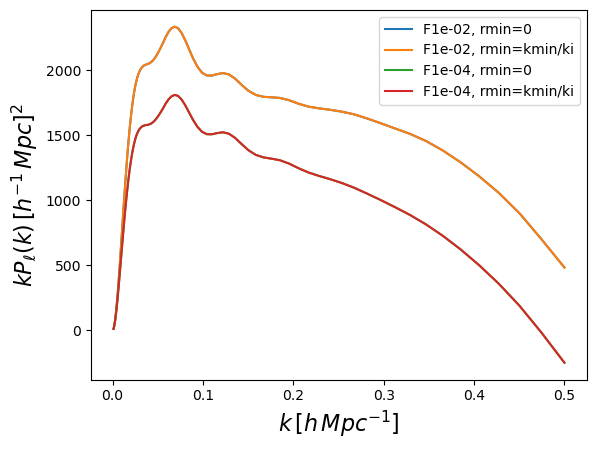

In [20]:
def bugstudy(pole='mono'):
    for fR0 in [1e-2, 1e-4]:
        for rmin0 in [True, False]:
            fkpt_model = run_fkpt(pk_name = 'pkl_z05.dat',
                                 zout = z_pk, Om = Om, h = h,
                                 b1 = b1, b2 = b2, bs2 = bs2, b3nl = b3nl,
                                 alpha0 = alpha0, alpha2 = alpha2, alpha4 = alpha4,
                                 ctilde = ctilde, pshotp = pshotp,  alpha0shot = alpha0shot, alpha2shot = alpha2shot,
                                 model = 'HS', fR0 = fR0, chatty=0, rmin0=rmin0)
            label = 'F%1.0e'%(fR0)
            label += ', rmin=0' if rmin0 else ', rmin=kmin/ki'
            plt.plot(fkpt_model['k'], fkpt_model['k'] * fkpt_model[pole],
                     label=label)
    plt.xlabel(r'$k \, [h\, {Mpc}^{-1}]$', fontsize =  16);
    plt.ylabel(r'$k P_{\ell}(k) \, [h^{-1} \, {Mpc}]^2$', fontsize =  16);
    #plt.xlim([0.0, 0.2]);
    plt.legend()

bugstudy()